In [1]:
using Plots
using LinearAlgebra
using LaTeXStrings

# Function to generate sphere coordinates
function sphere(N)
    θ = range(0, stop=π, length=N)
    ϕ = range(0, stop=2π, length=N)
    X = [sin(θ[i]) * cos(ϕ[j]) for i in 1:N, j in 1:N]
    Y = [sin(θ[i]) * sin(ϕ[j]) for i in 1:N, j in 1:N]
    Z = [cos(θ[i]) for i in 1:N, j in 1:N]
    return X, Y, Z
end

# Function to convert Cartesian to spherical coordinates
function cart2sph(x, y, z)
    hₓᵧ = hypot(x, y)
    r = hypot(hₓᵧ, z)
    el = atan(z, hₓᵧ)
    az = atan(y, x)
    return az, el, r
end

# Prepare to plot colors on a sphere
N = 500
X, Y, Z = sphere(N)

# Prepare to compute channel gains on the sphere
gainMap = zeros(Float64, size(X))

# Go through all azimuth and elevation angles
for n in 1:size(X, 1)
    for m in 1:size(X, 2)
        ϕ², θ², _ = cart2sph(X[n, m], Y[n, m], Z[n, m])
        
        if (ϕ² >= -π/2) && (ϕ² < π/2)
            gainMap[n, m] = 4 * cos(ϕ²) * cos(θ²)
        end
    end
end

# Convert gainMap to dB scale
gainMap_db = 10 * log10.(gainMap)

# Prepare data for plotting
x_flat = vec(X)
y_flat = vec(Y)
z_flat = vec(Z)
gainMap_db_flat = vec(gainMap_db)

colormap = cgrad(:thermal)

# Plot simulation results
scatter(x_flat, y_flat, z_flat
    , marker_z=gainMap_db_flat, color=:thermal, clim=(-6, 6)
    , colorbar=:true, colormap=colormap
    , markersize=1
    , xlabel = L"x", ylabel = L"y", zlabel= L"z"
    , legend = :false
)
cmap = cgrad(:thermal)
# l = @layout [a{139.5w} b]
# plot(layout=l)
# Plots.view(139.5, 30)
savefig("images/figure_1.10.png")


"/Users/valiha/Developer/mimobook/code/chapter1/images/figure_1.10.png"

<img src=images/figure_1.10.png width='' height='' > </img>

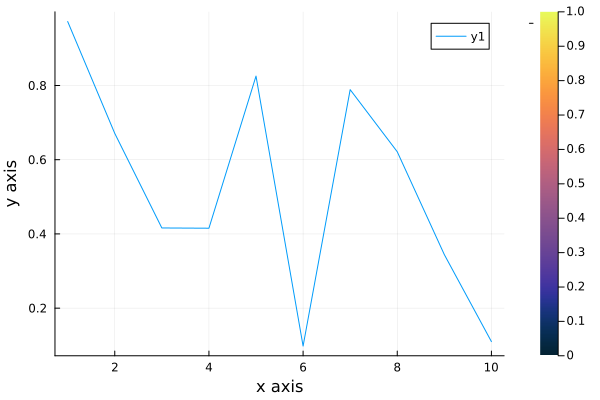

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [2]:
using Plots

l = @layout [a{0.95w} b]

colormap = cgrad(:thermal)
p1 = plot(rand(10)
    , xlabel="x axis", ylabel="y axis"
)
p2 = heatmap(rand(2,2), clims=(0,1), framestyle=:none, colormap=colormap, colorbar=true, lims=(-1,0))
plot(p1, p2, layout=l)

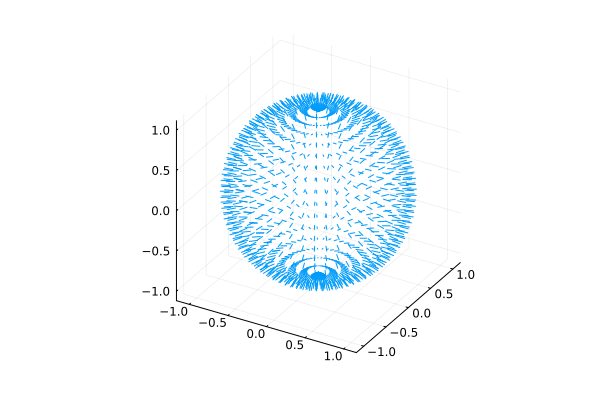

In [3]:
ϕs = range(-π, π, length = 50)
θs = range(0, π, length = 25)
θqs = range(1, π - 1, length = 25)
x = vec([sin(θ) * cos(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
y = vec([sin(θ) * sin(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
z = vec([cos(θ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
u = 0.1 * vec([sin(θ) * cos(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
v = 0.1 * vec([sin(θ) * sin(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
w = 0.1 * vec([cos(θ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
quiver(x, y, z, quiver = (u, v, w))

In [4]:
using Plots

# Function to generate sphere coordinates
function sphere(N)
    θ = range(0, stop=π, length=N)
    ϕ = range(0, stop=2π, length=N)
    X = [sin(θ[i]) * cos(ϕ[j]) for i in 1:N, j in 1:N]
    Y = [sin(θ[i]) * sin(ϕ[j]) for i in 1:N, j in 1:N]
    Z = [cos(θ[i]) for i in 1:N, j in 1:N]
    return X, Y, Z
end

# Prepare to plot the sphere
N = 500
X, Y, Z = sphere(N)

# Plot the sphere
surface(X, Y, Z, color=:blue, legend=false)
xlabel!("x")
ylabel!("y")
zlabel!("z")
title!("3D Sphere Plot")

# Save the plot if needed
savefig("images/sphere_plot.png")


"/Users/valiha/Developer/mimobook/code/chapter1/images/sphere_plot.png"

<img src=images/sphere_plot.png width='' height='' > </img>